# Week 1

## Part 1: What is an API?

### Exercise:

**Explain in your own words: What is the the difference between the html page and the wiki-source?**

The difference between the html page and the wiki-source is that the HTML is the content viewed by users on the web, the information that is rendered in the interface, while the wiki-soure is the editable content that is used to produce those pages. HTML is used directly in web development and has a specific format with a set of predefined tags as < a >, < pr >, < div >, < ul > ..., while wiki-source is used within a wiki platform to collaboratively create and edit content that is later displayed as an HTML page.


**What are the various parameters you can set for a query of the wikipedia api?**

From the code provided the different parameters are:
<ul>
    <li>action: specifies what we are trying to do, for example do a query, other possible values 'parse', 'edit', 'help'</li>
    <li>prop: it specifies which properties to get for pages. Common properties include info, revisions, categories, links, images.</li>
    <li>rvprop: this specifies what revision properties to return, when revision is set in prop, such as content, user, timestamp.</li>
    <li>titles: sets the name of the page that wants to be retrieved</li>
    <li>format: specifies the format of the response, for example json or xml</li>
</ul>

Additional useful parameters: 
<ul>
    <li>utf8: ensures that the output is encoded in this specific format</li>
    <li>list: Specifies what list to get. Examples include allpages, search, categorymembers.</li>
    <li>meta: Requests metadata about the wiki and the current user. Examples include siteinfo, userinfo. </li>
    <li>uselang: it specifies the language to return the content in (e.g., en for English, fr for French). </li>
</ul>

There are many more parameters that can be set in the query, more information can be found [here](https://www.mediawiki.org/wiki/API:Main_page).


**Write your own little notebook to download wikipedia pages based on the video above. Download the source for your 4 favorite wikipedia pages.**

In [26]:
import urllib.request

# set base url for wikipedia API and the different parameters
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title = "titles=Rembrandt"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

# four favorite pages
titles = ["Rembrandt", "Pablo_Picasso", "Caravaggio", "Michelangelo"]

queries = []
for title in titles:
    t = "titles=" + title
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, t, dataformat)
    queries.append(query)

print(queries)

['https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Rembrandt&format=json', 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Pablo_Picasso&format=json', 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Caravaggio&format=json', 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Michelangelo&format=json']


In [27]:
# once the urls are created, we request the query with the prevoiusly imported urllib library
wikitexts = []
for query in queries:
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    wikitexts.append(wikitext)


In [30]:
import json

# print the wikitexts
for wikitext in wikitexts:
    response = json.loads(wikitext)
    # I commented this out because it is too long
    # if want to see the result, uncomment it
    # print(response['query'])

## Part 2: Basic description of networks

### List three different real networks and state the nodes and links for each of them.
<ul>
    <li>Social network: where nodes are the people and the links the relations between them, as for example following, friend ... (Facebook, Instagram, Tik Tok)</li>
    <li>Trains: for example trains, where the nodes are the train stations and the links the railways that connects two cities.</li>
    <li>Biological networks: where the node are either proteins or metabolites and the edges are either metabolism, gene regulation, cell signaling or PPIs.</li>
</ul>

**Tell us of the network you are personally most interested in (a fourth one). Address the following questions:**
<br>Another possible networks is the aviation system.

**What are its nodes and links?**
<br>The nodes are the airports and the links the paths that the airplanes have to follow to connect two different citites.

**How large is it?**
<br>As large as the Globe, since there are connections from all the different continents.

**Can be mapped out?**
<br>Yes it can be mapped out as a connection of aiports throughout the globe.

**Does it evolve over time?**
<br>It does evolve over time because airports can be closed down or build up, so new nodes and edges appears. Additionally, due to external reasons as for example wars, some connections are cut, removing edges from the network or just changed because some aereal space is forbidden as for the Russian aereal space. Planes that want to cross from Europe to Asia have to either go through the North Pole or the Middle East, whereas before some of them travel through Russia. Also little time ago a Microsoft break down also made changes on the network.

**Are there processes occurring ON the network? (information spreading, for example)**
<br>There is processes occurring ON the network, as an airplane surpasses a city or is about to do it, it gathers information from different the main airport about wheter conditions, check if the altitud is correct, or if any changes have to be done to their current path in order to get to their destination. They not only talk with departure and arrival airport, but keep an status throughout the flight.

**Why do you care about it?**
My Dad is an air controler and we have talked a lot about it, I even had the change to flight once in the plane cabine with the pilots which was a very nice experience. Furthermore, now that I live abroad is it one of the main transports I depend on to get home, so I believe is a very interesting network. Additionally it connects all the world together in a little amount of time.

**In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book.**

I think nowadays the nework science has a big impact in social network, because due to many algorithms I believe is shapping people minds, as it can be seen in the Social Dilema Documentary from Netflix. Also as explained in the book the thrive of this area is economical, so social networks like Facebook, X, Instagram, Tik Tok or any other is 'fighing' against each other to get people's attention which makes their interest in networking increase. This has some advantages, but I believe is affecting also how people interacts with each other and how polirised the society is today. Since platforms like X allow people to express themselves anonymously, which I believe makes people mean, since there is little consequece in their words or influence. 

## Part 3: The awesome NetworkX library

Following NetworkX [tutorial](https://networkx.org/documentation/stable/tutorial.html).

In [43]:
import networkx as nx

# NODES
# creates a new undirected graph
G = nx.Graph()

# add nodes to the graph
G.add_node(1)

# creates a node from an iterable
G.add_nodes_from([2, 3])

# adds nodes from iterable with node attributes
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

# adds a node form another graph
# here graph G contains H
H = nx.path_graph(10)
G.add_nodes_from(H)

# a whole graph can also be set as a node
G.add_node(H)

In [48]:
# EDGES
# adding edges to the graph one at a time
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

# adding multiple edges
G.add_edges_from([(1, 2), (1, 3)])

# also an edge can be added as a ebunch (2, 3, {'weight': 3.1415}) with attributes
# or adding edges from another graph
G.add_edges_from(H.edges)

# nodes and edges can be readded even if priorly added
# clear a graph
G.clear()

# it ignores if preexists
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

# check number of nodes
print("Number of nodes: ", G.number_of_nodes())

# check number of edges
print("Number of edges: ", G.number_of_edges())

# The order of adjacency reporting (e.g., G.adj, G.successors, G.predecessors) is the order of edge addition. 
# However, the order of G.edges is the order of the adjacencies which includes both the order of the nodes and each node’s adjacencies. 
# creates new directed graph
# See example below:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

Number of nodes:  8
Number of edges:  3


In [49]:
# EXAMINING ELEMS OF A GRAPH

print(list(G.nodes))
print(list(G.edges))
list(G.adj[1])  # or list(G.neighbors(1))
print(G.degree[1])  # the number of edges incident to 1
print(G.edges([2, 'm'])) # edges incident to 2 or 'm'
print(G.degree([2, 3]))  # degree of 2 or 3

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
2
[(2, 1), ('m', 3)]
[(2, 1), (3, 2)]


In [50]:
## REMOVING ELEMS FROM A GRAPH
# can not remove a node if does not exists
# removing nodes
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))

# removing an edge
G.remove_edge(1, 3)
print(list(G))

[1, 3, 'spam']
[]


In [53]:
## USING GRAPH CONSTRUCTORS
# data can be passed directly to constructor
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
print(list(H.edges()))

# other option
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
print(list(H.edges()))

# or from adjacency list
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
print(list(H.edges()))

[(1, 2), (2, 1)]
[(0, 1), (1, 2), (2, 3)]
[(0, 1), (0, 2), (1, 2)]


### What to use as nodes and edges
You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using G.add_edge(n1, n2, object=x).

In [59]:
# ACCESSING EDGES AND NEIGHBORS
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(G[1])  # same as G.adj[1]

# get the edge attributes
print(G[1][2])
print(G.edges[1, 2])

# other possible options
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
print(G.edges[1, 2])

# Fast examination of all (node, adjacency) pairs is achieved using G.adjacency(), or G.adj.items().
# Note that for undirected graphs, adjacency iteration sees each edge twice.
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

# Convenient access to all edges is achieved with the edges property.
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

{2: {'color': 'yellow'}}
{'color': 'yellow'}
{'color': 'yellow'}
{'color': 'red'}
(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)
(1, 2, 0.125)
(3, 4, 0.375)


### Adding attributes to graphs, nodes, and edges
Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.nodes, and G.edges for a graph G.

In [61]:
# GRAPH ATTRIBUTES
G = nx.Graph(day="Friday")
print(G.graph)

# can modify attrs
G.graph['day'] = "Monday"
print(G.graph)

{'day': 'Friday'}
{'day': 'Monday'}


In [65]:
## NODE AND EDGE ATTRIBUTES
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.nodes[1])

# add another attr
G.nodes[1]['room'] = 714
print(G.nodes.data())

# edges
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
print(G.edges.data())

{'time': '5pm', 'room': 714}
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'}), (2, {}), (4, {}), (5, {})]
[(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})]


In [67]:
# DIRECTED GRAPHS
# The DiGraph class provides additional methods and properties specific to directed edges, e.g., 
# DiGraph.out_edges, DiGraph.in_degree, DiGraph.predecessors(), DiGraph.successors() etc. 
# To allow algorithms to work with both classes easily, the directed versions of neighbors is equivalent to successors 
# while DiGraph.degree reports the sum of DiGraph.in_degree and DiGraph.out_degree even though that may feel inconsistent at times.

DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.out_degree(1, weight='weight'))
print(DG.degree(1, weight='weight'))
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

#  If you want to treat a directed graph as undirected for some measurement you should probably convert it using Graph.to_undirected() or with
H = nx.Graph(G)  # convert G to undirected graph

0.5
1.25
[2]
[2]


In [68]:
# MULTIGRAPHS
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print(dict(MG.degree(weight='weight')))

# find shortest path
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

print(nx.shortest_path(GG, 1, 3))

{1: 1.25, 2: 1.75, 3: 0.5}
[1, 2, 3]


In [ ]:
# Graph generators and graph operations
# check this part on the tutorial link above

In [71]:
# ANALYZING GRAPHS
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
# show that nodes 1, 2 and 3 are connected and then there is the spam node 
print(list(nx.connected_components(G)))

# show the number of connected components
print(sorted(d for n, d in G.degree()))

# show the clustering of the nodes
print(nx.clustering(G))

# show the shortest path from 3
sp = dict(nx.all_pairs_shortest_path(G))
print(sp[3])

[{1, 2, 3}, {'spam'}]
[0, 1, 1, 2]
{1: 0, 2: 0, 3: 0, 'spam': 0}
{3: [3], 1: [3, 1], 2: [3, 1, 2]}


Matplotlib is building the font cache; this may take a moment.


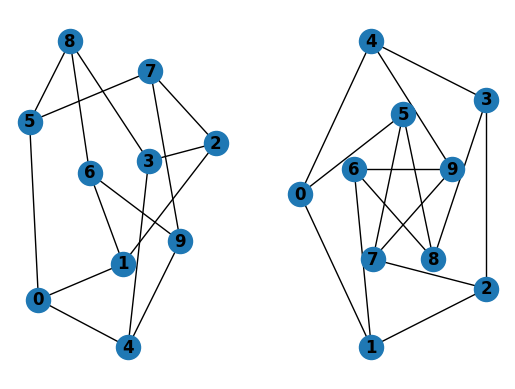

In [72]:
# DRAWING GRAPHS
import matplotlib.pyplot as plt

G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

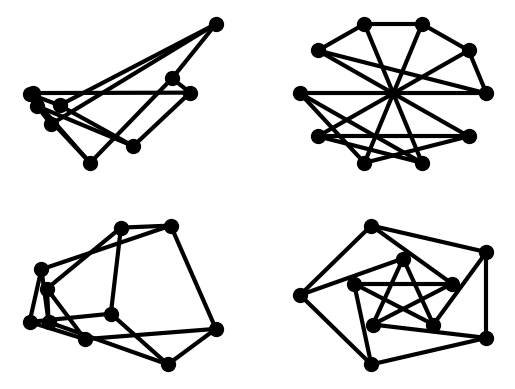

In [74]:
# not interactive mode
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

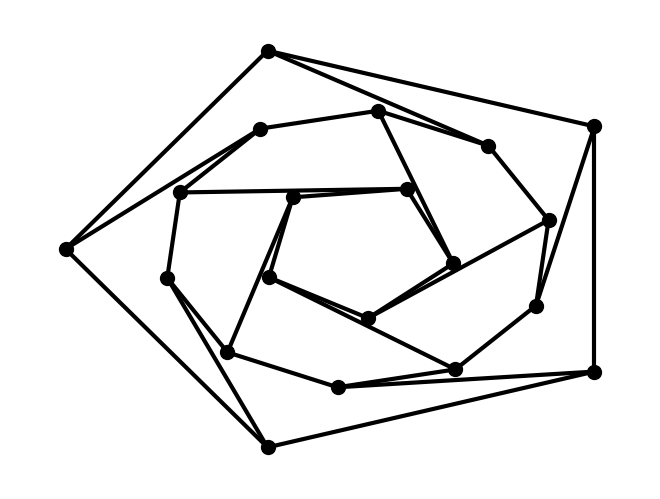

In [75]:
# another example
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

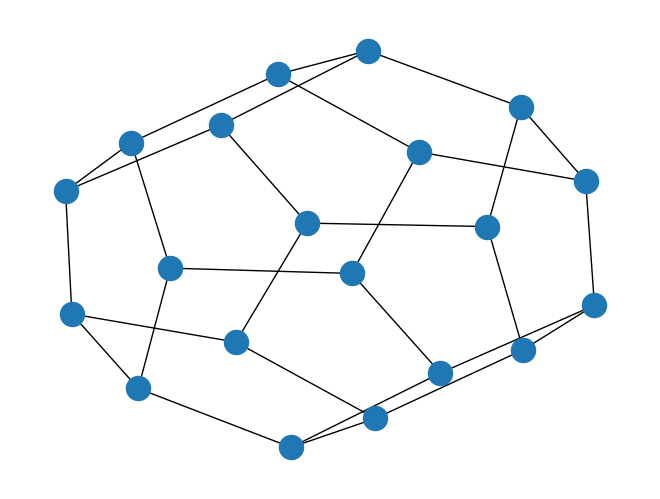

In [76]:
# save the file
nx.draw(G)
plt.savefig("path.png")

In [78]:
# trying dot format
# from networkx.drawing.nx_pydot import write_dot
# pos = nx.nx_agraph.graphviz_layout(G)
# nx.draw(G, pos=pos)
# write_dot(G, 'file.dot')
# NOT INSTALLED YET :)